# Assignment 4

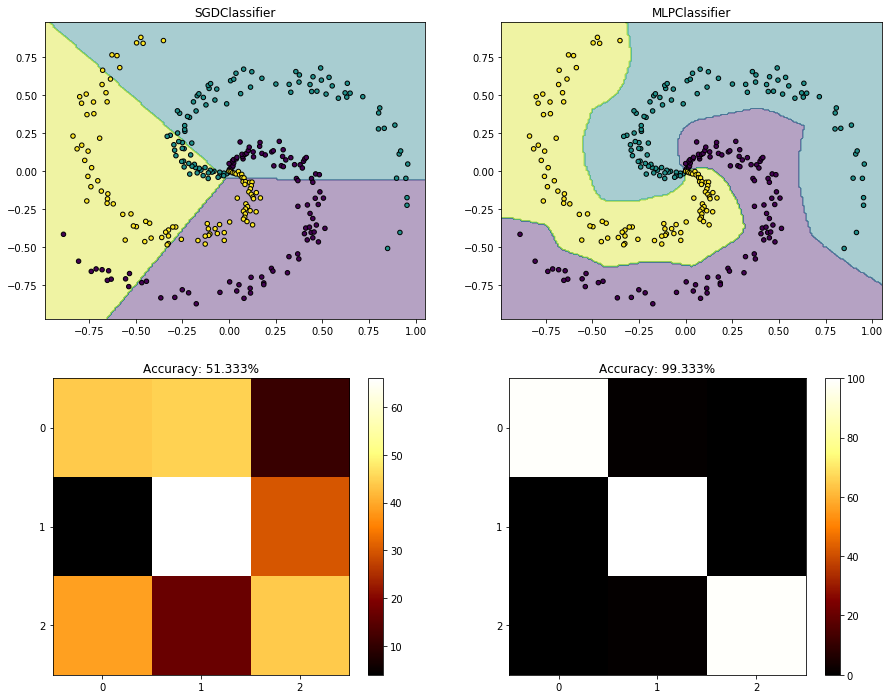

In [3]:
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
from sklearn import linear_model
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix

# Load data
data = np.genfromtxt('spiral.csv', delimiter=',', skip_header=1)
X = data[:, 0:2]
Y = data[:, 2]

# Setup/define
sdg = linear_model.SGDClassifier(loss='log', tol=0.001)
mlp = MLPClassifier(hidden_layer_sizes=72, max_iter=1000, learning_rate_init=0.1)

# Train
sdg.fit(X, Y)
mlp.fit(X, Y)

# Plot
x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

fig, axarr = plt.subplots(2, 2, figsize=(15, 12))

for idx, clf, tt in zip([0, 1],
                        [sdg, mlp],
                        ['SGDClassifier', 'MLPClassifier']):
    # Decision regions
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax = axarr[0, idx]
    ax.contourf(xx, yy, Z, alpha=0.4)
    ax.scatter(X[:, 0], X[:, 1], c=Y, s=20, edgecolor='k')
    ax.set_title(tt)
    
    # Confusion matrices
    im = axarr[1, idx].imshow(confusion_matrix(Y, clf.predict(X)), interpolation='nearest', cmap=cm.afmhot)
    ax = axarr[1, idx]
    ax.set_title('Accuracy: {0:.3%}'.format(clf.score(X,Y)))
    ax.set_xticks(np.arange(min(Y), max(Y)+1, 1.0))
    ax.set_yticks(np.arange(min(Y), max(Y)+1, 1.0))
    fig.colorbar(im, ax=ax)
  
plt.show()

In [28]:
import numpy as np
import time

from keras.models import Sequential
from keras.datasets import mnist
from keras.layers import Dense, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import np_utils
from keras import backend

# Adjust for Theano
backend.set_image_dim_ordering('th')

# Load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Specify dimension depth
X_train = X_train.reshape(X_train.shape[0], 1, 28, 28)
X_test = X_test.reshape(X_test.shape[0], 1, 28, 28)

# Normalize
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

# Declare models
convModel = Sequential()
convModel.add(Conv2D(8, (5, 5), activation='relu', input_shape=(1, 28,28)))
convModel.add(MaxPooling2D(pool_size=(2,2)))
convModel.add(Conv2D(16, (5, 5), activation='relu', input_shape=(32, 14,14)))
convModel.add(MaxPooling2D(pool_size=(2,2)))
convModel.add(Flatten())
convModel.add(Dense(64, activation='relu'))
convModel.add(Dense(10, activation='softmax'))

linModel = Sequential()
linModel.add(Flatten())
linModel.add(Dense(10, activation='softmax', input_shape=(10,)))

# Compile models
convModel.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
linModel.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
                 
# Train models
convStart = time.time()
convModel.fit(X_train, Y_train, batch_size=32, epochs=10, verbose=1)
convTime = time.time() - convStart
                 
linStart = time.time()
linModel.fit(X_train, Y_train, batch_size=32, epochs=15, verbose=1)
linTime = time.time() - linStart

# Evaluate models
convScore = convModel.evaluate(X_test, Y_test, verbose=0)
linScore = linModel.evaluate(X_test, Y_test, verbose=0)

# Print result
print('\nConvolutional classifier:\nTime:{}\nLoss: {:.4f}\nAccuracy: {:.4%}'.format(convTime, convScore[0], convScore[1]))
print('\nLinear classifier:\nTime:{:.0f} s\nLoss: {:.4f}\nAccuracy: {:.4%}'.format(linTime, linScore[0], linScore[1]))




Epoch 1/10
60000/60000 [==============================] - 27s 447us/step - loss: 0.1993 - acc: 0.9389
Epoch 2/10
60000/60000 [==============================] - 27s 449us/step - loss: 0.0655 - acc: 0.9801
Epoch 3/10
60000/60000 [==============================] - 25s 424us/step - loss: 0.0484 - acc: 0.9850
Epoch 4/10
60000/60000 [==============================] - 25s 415us/step - loss: 0.0383 - acc: 0.9879 ETA: 4s
Epoch 5/10
60000/60000 [==============================] - 26s 430us/step - loss: 0.0302 - acc: 0.9905
Epoch 6/10
60000/60000 [==============================] - 34s 565us/step - loss: 0.0260 - acc: 0.9919
Epoch 7/10
60000/60000 [==============================] - 29s 476us/step - loss: 0.0233 - acc: 0.9923
Epoch 8/10
60000/60000 [==============================] - 26s 431us/step - loss: 0.0187 - acc: 0.9939
Epoch 9/10
60000/60000 [==============================] - 27s 454us/step - loss: 0.0170 - acc: 0.9945
Epoch 10/10
60000/60000 [==============================] - 27s 447us/ste